In [1]:
#linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df=pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


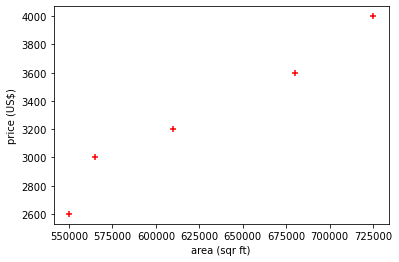

In [3]:
%matplotlib inline
plt.xlabel("area (sqr ft)")
plt.ylabel('price (US$)')
plt.scatter(df.price,df.area, color="red",marker='+')

In [4]:
#create a linear regression object
#reg=linear_model.LinearRegression()
model=linear_model.LinearRegression()
#fit the model-train LM using available data set
#reg.fit(df[['area']], df.price)
model.fit(df[['area']], df.price)

LinearRegression()

In [5]:
#no error in the above shows, the model is ready to predict
#reg.coef_
model.coef_

array([135.78767123])

In [6]:
#reg.intercept_
model.intercept_

180616.43835616432

In [7]:
135.78767123*3300+180616.43835616432

628715.7534151643

In [8]:
135.78767123*5000+180616.43835616432

859554.7945061643

In [9]:
#reg.predict([[3300]])
model.predict([[5000]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [10]:
#d=read_csv('areas.csv')
#d.head(3)
#p=reg.predict(d)
#d['prices']=p

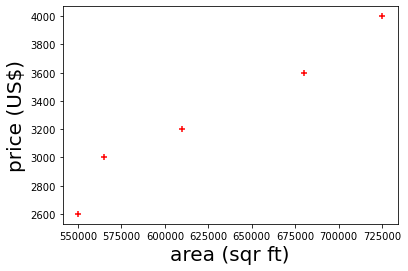

In [11]:
%matplotlib inline
plt.xlabel("area (sqr ft)",fontsize=20)
plt.ylabel('price (US$)',fontsize=20)
plt.scatter(df.price,df.area, color="red",marker='+')
#plt.plot(df.area,reg.predict(df[['area']]),color="blue")

In [12]:
#Save and load trained Model Using Joblib And Pickle
#linear regression
import pickle

In [13]:
with open('model_pickle','wb') as f:
    pickle.dump(model,f)

In [14]:
with open('model_pickle','rb') as f:
    mp=pickle.load(f)

In [15]:
mp.predict([[5000]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [16]:
#method 2_using joblib from sklearn
import joblib

In [17]:
joblib.dump(model,'joblib_model')

['joblib_model']

In [18]:
mj=joblib.load('joblib_model')

In [19]:
mj.predict([[5000]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [20]:
mj.coef_

array([135.78767123])

In [21]:
mj.intercept_

180616.43835616432

In [22]:
#Dummy Variables & One Hot Encoding
#Homeprice data with several townships
#aim: Build a predictor function to predict price of a home; with 3400 sqrft area in west windsor
#with 2800 sqr ft home in robinsville
#Dealing with categorical variables: Norminal-no order, ordinal-have some sort of numerical ordering
#One hot encoding technique is used to assign text, numerical values
import pandas as pd
df=pd.read_csv("homeprices1.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [23]:
#creating dummy variables columns (for each town)
dummies=pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


In [24]:
#concatinating the dummy data to the original data (axis-how do you want to join)
merged=pd.concat([df,dummies], axis="columns")
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


In [25]:
#drop the the text column (town) Linear regression not going to use text
#also drop one of the dummy variable to avoid dummy trap- caused by multi-colinearlity(problem to Machine learning model)
#so if you have 5 dummy variables you drop 1 to remain with 4. in this case remain with 2(sklearn linear_model drops it auto though)
final=merged.drop(["town","west windsor"], axis="columns")
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [26]:
#import your linear model from sklearn
from sklearn.linear_model import LinearRegression
model=LinearRegression()


In [27]:
X=final.drop('price', axis='columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [28]:
y=final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [29]:
#training the model
model.fit(X,y)

LinearRegression()

In [30]:
#predictions price robinsville
model.predict([[2800,0,1]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [31]:
#predictions price west windsor
model.predict([[3400,0,0]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [32]:
#checking model accuracy: use the score function
#calculates the predicted values using X and compares with actual values y;
model.score(X,y)


0.9573929037221873

In [33]:
#Using sklearn One Hot Encoding
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [34]:
#first step: do lable encoding
from sklearn.preprocessing import LabelEncoder
#create class object
le=LabelEncoder()

In [35]:
#create a new data frame
dfle=df
#use lable encoder to fit and transform
dfle.town=le.fit_transform(dfle.town)
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [36]:
#use values to make X a 2 dm array not a data frame 
X=dfle[['town','area']].values
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [37]:
y=dfle.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [38]:
#next we create dummy variables
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(categorical_features=[0])

TypeError: __init__() got an unexpected keyword argument 'categorical_features'

In [39]:
#fit and transform using the ohe object; supplying only X it will assume all X to be categorical variables; 
#Hence its key to supply the categorical feature you are interested with when creating the object
X= ohe.fit_transform(X).toarray()
X

NameError: name 'ohe' is not defined

In [53]:
#performing dummy trapping (drop 1 dummy variable)-first column
X=X[:,1:] #applicaple for 2 array variable: [Take allthe rows, take all columns from index 1]
X

array([[1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1.,
        1., 0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0.],
       [1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        0., 1., 1., 0., 1., 0.],
       [1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
        1., 0., 0., 1., 1., 0.],
       [0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0.,

In [54]:
#fit the model
model.fit(X,y)

LinearRegression()

In [60]:
#model.predict([[1,0,2800]])#robinsville
#model.predict([[0,1,3400]])#west windsor

In [99]:
#exercise
import pandas as pd
df = pd.read_csv("carprices.csv")
df

,Car Model,Mileage,Sell_Price,Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [100]:
dummies = pd.get_dummies(df['Car Model'])
dummies

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [101]:
merged1=pd.concat([df,dummies],axis='columns')
merged1

,Car Model,Mileage,Sell_Price,Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [102]:
final1=merged1.drop(['Car Model','Mercedez Benz C class'],axis='columns')
final1

,Mileage,Sell_Price,Age(yrs),Audi A5,BMW X5
0,69000,18000,6,0,1
1,35000,34000,3,0,1
2,57000,26100,5,0,1
3,22500,40000,2,0,1
4,46000,31500,4,0,1
5,59000,29400,5,1,0
6,52000,32000,5,1,0
7,72000,19300,6,1,0
8,91000,12000,8,1,0
9,67000,22000,6,0,0


In [103]:
x=final1.drop('Sell_Price',axis='columns')
x

,Mileage,Age(yrs),Audi A5,BMW X5
0,69000,6,0,1
1,35000,3,0,1
2,57000,5,0,1
3,22500,2,0,1
4,46000,4,0,1
5,59000,5,1,0
6,52000,5,1,0
7,72000,6,1,0
8,91000,8,1,0
9,67000,6,0,0


In [104]:
y=final1['Sell_Price']
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell_Price, dtype: int64

In [105]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [106]:
reg.fit(x,y)

LinearRegression()

In [107]:
#price of a benz 4yr old, mlge 45000
reg.predict([[45000,4,0,0]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

In [108]:
#price of a bmw 7yr old, mlge 86000
reg.predict([[86000,7,0,1]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])

In [109]:
reg.score(x,y)

0.9417050937281083

In [110]:
import matplotlib.pyplot as plt

In [111]:
df

,Car Model,Mileage,Sell_Price,Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


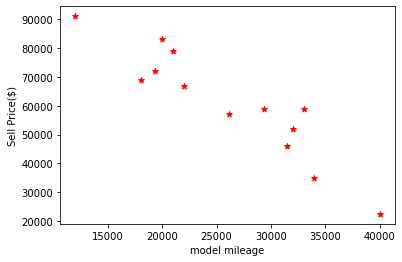

In [113]:
%matplotlib inline
plt.xlabel('model mileage')
plt.ylabel('Sell Price($)')
plt.scatter( df.Sell_Price,df.Mileage, color='red', marker='*')

In [ ]:
%matplotlib inline
plt.xlabel("area (sqr ft)")
plt.ylabel('price (US$)')
plt.scatter(df.price,df.area, color="red",marker='+')

In [20]:
#Machine Learning Tutorial Python - 7: Training and Testing Data
#Split available data into training and test using 
#sklearn.model_selection.train_test_split
import pandas as pd
data=pd.read_csv('carprices1.csv')
data

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


In [21]:
import matplotlib.pyplot as plt
%matplotlib inline


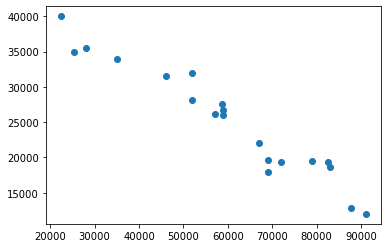

In [22]:
#relationship btw the dependent and independent variables
plt.scatter(data['Mileage'],data['Sell Price($)'])

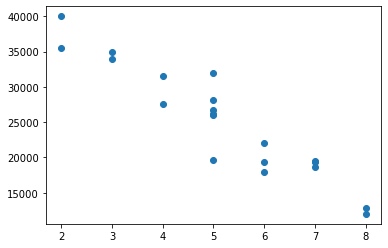

In [23]:
plt.scatter(data['Age(yrs)'],data['Sell Price($)'])

In [24]:
X=data[['Mileage','Age(yrs)']]
y=data['Sell Price($)']

In [25]:
X

,Mileage,Age(yrs)
0,69000,6
1,35000,3
2,57000,5
3,22500,2
4,46000,4
5,59000,5
6,52000,5
7,72000,6
8,91000,8
9,67000,6


In [26]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     26750
6     32000
7     19300
8     12000
9     22000
10    18700
11    19500
12    26000
13    27500
14    19400
15    35000
16    35500
17    19700
18    12800
19    28200
Name: Sell Price($), dtype: int64

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
#test_size the raio you want to split your data using; 0.2 implies 20% test and 80% train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [29]:
len(X_train)

16

In [30]:
#chooses random samples which is good
#if you want the data not to keep changing add random_state=10 after test_size
X_train

,Mileage,Age(yrs)
19,52000,5
18,87600,8
7,72000,6
16,28000,2
11,79000,7
10,83000,7
9,67000,6
1,35000,3
6,52000,5
3,22500,2


In [31]:
from sklearn.linear_model import LinearRegression
clf=LinearRegression()

In [32]:
clf.fit(X_train,y_train)

LinearRegression()

In [33]:
clf.predict(X_test)

array([38057.03200889, 30590.44354642, 25733.41641722, 22299.78308397])

In [34]:
y_test

15    35000
4     31500
12    26000
17    19700
Name: Sell Price($), dtype: int64

In [35]:
#score method uses X_test to predict the new values and use y_test to compare and tell the accuracy of the model
clf.score(X_test,y_test)

0.8732373329161415

In [36]:
#Machine Learning Tutorial Python - 8: Logistic Regression (Binary Classification)
#linear regression can be used to predict other things; weather stock prices: prediction value being continuous
#for prediction value which is categorecal: yes or no, or one of the available categories~the problem is called classsification
#Logistic regression is the technique used to solve these classification problems
#binary classification: answers yes or no (2 categories)
#multiclass classification: more than 2 categories
#how likely is your customer likely to buy an insurance if working in a life insurance company?

In [37]:
#Sigmoid or Logit function: 1/1+e^-z where e=Euler's Number~2.71828; converts input into range 0 to 1
#basicaly feeding a linear regression line y=m*x+b into the sigmoid to get a s-shaped curve y=1/1+e^-(m*x+b)
import pandas as pd
df=pd.read_csv('insurance_data.csv')
df.head()

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

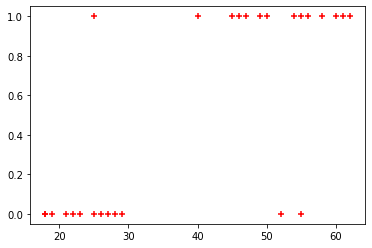

In [39]:
plt.scatter(df.age,df.bought_insurance,color='red',marker='+')

In [40]:
from sklearn.model_selection import train_test_split

In [44]:
#shift+tab on the function to get the arguments;;;;x is multidimensional reason to use 2 sqr brac
X_train,X_test,y_train,y_test=train_test_split(df[['age']],df.bought_insurance,test_size=0.1)

In [46]:
X_train
X_test

,age
23,45
15,55
25,54


In [47]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [48]:
model.fit(X_train,y_train)

LogisticRegression()

In [49]:
model.predict(X_test)

array([1, 1, 1], dtype=int64)

In [50]:
y_test

23    1
15    1
25    1
Name: bought_insurance, dtype: int64

In [51]:
model.score(X_test,y_test)

1.0

In [52]:
model.predict_proba(X_test)

array([[0.35790134, 0.64209866],
       [0.13746816, 0.86253184],
       [0.15299774, 0.84700226]])

In [54]:
model.predict([[25]])

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [55]:
#exercise: HR department: which factors affect employes detention
import pandas as pd
hr_data=pd.read_csv('HR_comma_sep.csv')
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [59]:
#Data exploration and visualization to figure out which variables have direct impact on eployee detention
#how many employees left
left = hr_data[hr_data.left==1]
left.shape

(3571, 10)

In [60]:
#How many employees were retained?
retained=hr_data[hr_data.left==0]
retained.shape

(11428, 10)

In [61]:
#Average numbers for all columns
hr_data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [62]:
#From above table we can draw following conclusions,

#**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)
#**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
#**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

<AxesSubplot:xlabel='salary'>

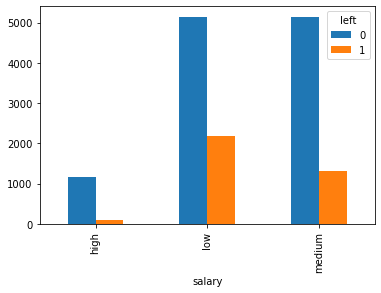

In [64]:
#Impact of salary on employee retention
pd.crosstab(hr_data.salary,hr_data.left).plot(kind='bar')
#below bar chart shows employees with high salaries are likely to not leave the company

<AxesSubplot:xlabel='Department'>

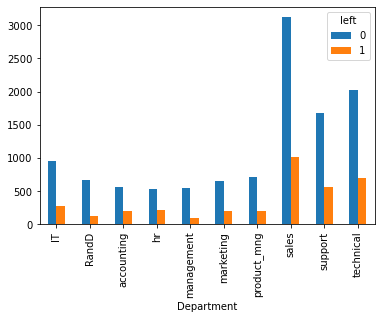

In [67]:
#correlation between Department and employee retention rate
pd.crosstab(hr_data.Department,hr_data.left).plot(kind='bar')
#From below chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

In [68]:
#From the data analysis so far we can conclude that we will use following variables as independant variables in our model
#**Satisfaction Level**
#**Average Monthly Hours**
#**Promotion Last 5 Years**
#**Salary**
subhr_data = hr_data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subhr_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [69]:
#Tackle salary dummy variable
#Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. 
#Check my one hot encoding tutorial to understand purpose behind dummy variables.
salary_dummies=pd.get_dummies(subhr_data.salary, prefix="salary")
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
14994,0,1,0
14995,0,1,0
14996,0,1,0
14997,0,1,0


In [70]:
merged_subhr_data=pd.concat([subhr_data,salary_dummies], axis='columns')

In [72]:
final_subhr_data=merged_subhr_data.drop('salary', axis='columns')
#alternatively: merged_subhr_data=merged_subhr_data.drop('salary', axis='columns',inplace=True)
final_subhr_data

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
14994,0.40,151,0,0,1,0
14995,0.37,160,0,0,1,0
14996,0.37,143,0,0,1,0
14997,0.11,280,0,0,1,0


In [73]:
X=final_subhr_data
#X

In [76]:
y=hr_data.left
#y

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [78]:
from sklearn.linear_model import LogisticRegression
hr_model=LogisticRegression()

In [79]:
hr_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
hr_model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
#accuracy of the model
hr_model.score(X_test,y_test)

0.7733333333333333

In [2]:
#Machine Learning Tutorial Python - 8 Logistic Regression (Multiclass Classification)
#Identify Hand written digits
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits 

In [3]:
#call load_digit::basically to load my training set
digits= load_digits()

In [4]:
#explore the contents of the training set (what it contains)
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [5]:
#data has the neumeric data. 
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

<Figure size 432x288 with 0 Axes>

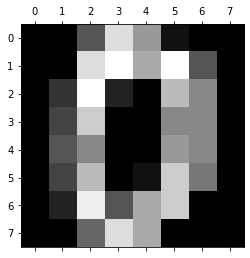

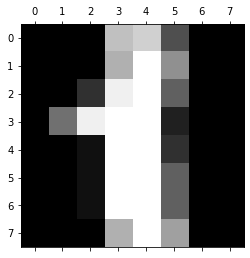

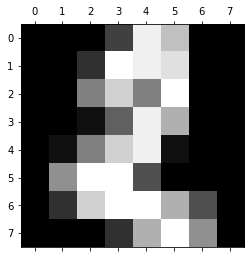

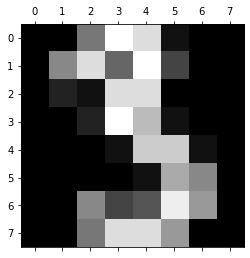

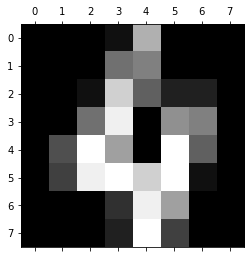

In [9]:
#image has the actual image
plt.gray()
#plt.matshow(digits.images[0])
#to print the first 5 samples 
for i in range(5):
    plt.matshow(digits.images[i])

In [10]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test= train_test_split(digits.data,digits.target,test_size=0.2)

In [13]:
len(X_train)

1437

In [14]:
len(X_test)

360

In [15]:
#we can use data and target to train our model
from sklearn.linear_model import LogisticRegression
digits_model=LogisticRegression()

In [16]:
digits_model.fit(X_train,y_train)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [17]:
#getting all predicted values
digits_model.predict(X_test)

array([0, 2, 3, 7, 3, 7, 7, 9, 5, 3, 0, 3, 8, 6, 3, 1, 6, 7, 3, 5, 5, 9,
       4, 0, 0, 3, 0, 3, 2, 5, 2, 0, 2, 3, 8, 7, 6, 5, 9, 3, 3, 7, 1, 1,
       8, 6, 3, 8, 6, 5, 2, 0, 4, 3, 3, 5, 1, 2, 9, 3, 4, 9, 9, 1, 0, 4,
       9, 5, 9, 3, 1, 8, 3, 7, 0, 9, 4, 3, 7, 9, 6, 8, 3, 5, 4, 4, 4, 4,
       7, 1, 4, 3, 9, 3, 1, 2, 3, 8, 1, 6, 2, 8, 2, 3, 2, 2, 8, 3, 7, 4,
       1, 9, 5, 8, 1, 3, 6, 5, 5, 8, 2, 1, 5, 1, 8, 2, 1, 4, 9, 5, 4, 8,
       9, 7, 8, 5, 2, 1, 0, 4, 0, 3, 8, 6, 8, 4, 9, 6, 5, 5, 3, 8, 5, 4,
       8, 7, 0, 7, 1, 0, 0, 1, 9, 7, 6, 5, 2, 7, 1, 6, 5, 7, 5, 1, 2, 1,
       1, 5, 2, 9, 8, 8, 7, 7, 1, 8, 3, 5, 3, 6, 6, 5, 1, 5, 9, 0, 4, 9,
       0, 2, 8, 5, 1, 3, 2, 6, 9, 0, 5, 7, 9, 0, 5, 7, 1, 7, 7, 9, 4, 0,
       3, 0, 8, 5, 1, 8, 6, 4, 8, 7, 8, 8, 9, 0, 7, 7, 4, 2, 1, 9, 1, 3,
       0, 2, 0, 4, 9, 3, 9, 6, 1, 5, 6, 2, 9, 7, 6, 4, 2, 6, 7, 9, 8, 8,
       3, 8, 5, 8, 2, 8, 9, 5, 9, 9, 1, 0, 8, 4, 2, 2, 1, 6, 6, 5, 4, 5,
       7, 4, 4, 0, 4, 5, 4, 4, 8, 6, 3, 0, 1, 4, 1,

In [18]:
#accuracy of the model
digits_model.score(X_test,y_test)

0.9583333333333334

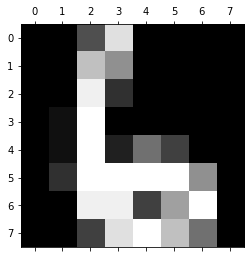

In [19]:
#pick a random variable
plt.matshow(digits.images[67])

In [20]:
#corresponding number
digits.target[67]

6

In [21]:
#make predictions
digits_model.predict([digits.data[67]])

array([6])

In [22]:
digits_model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

In [23]:
#since the model accuracy is not 100% and the samples we are using it predicts correctly, 
#one would want to know where it fails:one of the ways;use of confusion matrix
y_predicted=digits_model.predict(X_test)
from sklearn.metrics import confusion_matrix
#confusion matrix suply the truth followed by what the model predicted
cm=confusion_matrix(y_test,y_predicted)
cm

array([[33,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 31,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  1,  0,  0,  0,  1],
       [ 0,  1,  0,  0, 35,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 29,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 30,  0,  1],
       [ 0,  1,  0,  0,  0,  1,  0,  1, 42,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1, 34]], dtype=int64)

Text(69.0, 0.5, 'Truth')

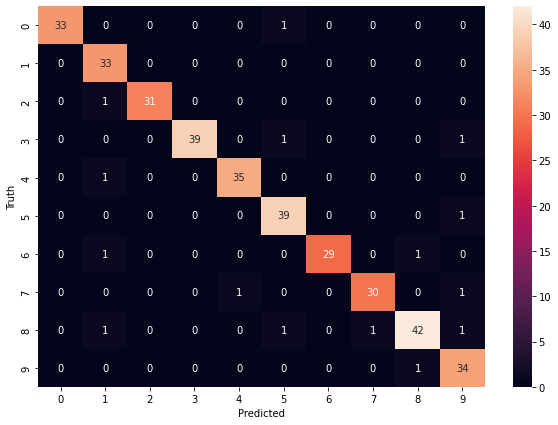

In [24]:
#visualizing the confusion matrix using seaborn library (similar to matplotlib)
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [ ]:
#Intepretation:  37 times the truth was 0 and the model predicted it to be zero;
#1 time I fed my model with the truth 4 (image) and the model predicted 1.
#any where in the area above or below the diagonal without 0 the model failed

In [26]:
#Exercise: iris flower dataset in sklearn.datasets
#150 samples containing the following features: sepal length, sepal width, petal length, patal width
#classify the flower into: Selosa, Versicolour, virginica (the 3 iris flowers)
#Required: Train the dataset using logistic regression, identify model accuracy, predict different samples
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris

In [27]:
iris_data=load_iris()

In [28]:
dir(iris_data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [29]:
iris_data.data[0]

array([5.1, 3.5, 1.4, 0.2])

In [30]:
iris_data.target[0]

0

In [31]:
iris_data.target_names[0]

'setosa'

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test= train_test_split(iris_data.data,iris_data.target,test_size=0.2)

In [34]:
len(X_train)

120

In [35]:
len(X_test)

30

In [36]:
from sklearn.linear_model import LogisticRegression
iris_model=LogisticRegression()

In [37]:
iris_model.fit(X_train,y_train)

LogisticRegression()

In [38]:
iris_model.score(X_test,y_test)

1.0

In [39]:
y_predicted=iris_model.predict(X_test)
y_predicted

array([1, 2, 0, 1, 2, 2, 0, 1, 0, 0, 1, 2, 0, 2, 1, 2, 1, 1, 1, 1, 0, 1,
       2, 2, 0, 0, 2, 0, 2, 0])

In [42]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_predicted)
cm1

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'True')

<Figure size 432x288 with 0 Axes>

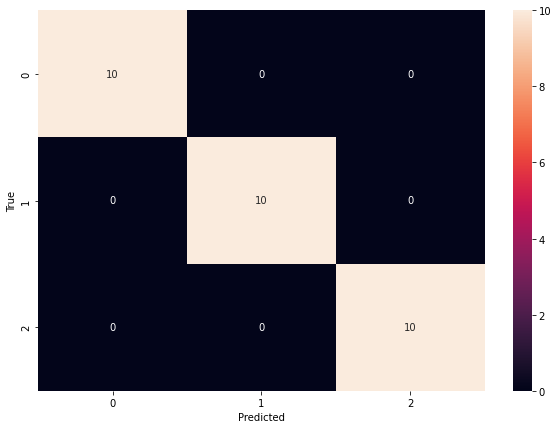

In [ ]:
import seaborn as sn
plt.gray()
plt.figure(figsize=(10,7))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True')


In [3]:
#Machine Learning Tutorial Python - 10 Support Vector Machine (SVM)(classification algorithmn)
#where decision bounderies are many and you have to make a choice btn the lines with higher margin or small
#SVM maximises the margin btn the near data points(support vectors) and the line itself
#SVM draws a hyper plane in n dimensional space s.t it maximizes margin btn classfication grps
#Gamma: (High or low)
#Regularization(C):(High or Low)
#if you have a complex dataset try to add another dimension: z=x^2 +y^2,then classify> This classification is called kernel
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [6]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
#create a data frame~easy to visualize
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
#append to the data frame the target variable
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
#to check how many rows with 1 in the data set (from 50-99)
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [11]:
#to check how many rows with 2 in the data set (from 100)
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [13]:
#adding one more column, flower names: from one column you are trying to generate another column: use apply fxn
#lambda is just a small fxn|a transformation that you can apply to target to generate the new column
#each value x, it will return the index of the value in target_names
df['flower_names']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [14]:
#data visualization
from matplotlib import pyplot as plt

In [16]:
#concept specific to jupiter notebook
%matplotlib inline 

In [18]:
#separating into 3 data frames bases on target
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

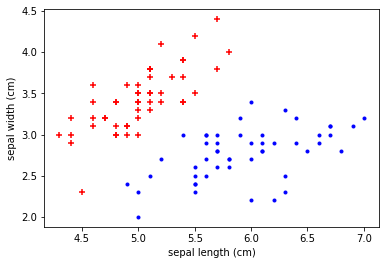

In [24]:
#sepal length vs sepal width
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='.')

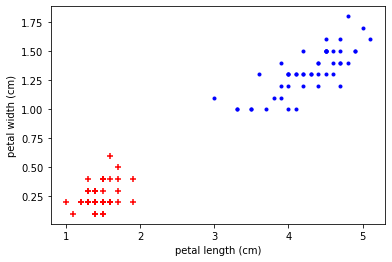

In [25]:
#petal length vs petal width
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='red',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='blue',marker='.')

In [26]:
from sklearn.model_selection import train_test_split 

In [28]:
X=df.drop(['target','flower_names'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
y=df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

In [39]:
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)

In [40]:
print(len(X_train))
print(len(X_test))

120
30


In [21]:
#SVC is the classifier
#by default C=1.0 etc one can use different parameters e.g C=10,karnel=linear, gamma=100
from sklearn.svm import SVC
model=SVC(kernel='linear')

NameError: name 'karnel' is not defined

In [42]:
model.fit(X_train,y_train)

SVC(C=10)

In [43]:
model.score(X_test,y_test)

0.9666666666666667

In [44]:
y_predicted=model.predict(X_test)

In [45]:
from sklearn.metrics import confusion_matrix
cm2=confusion_matrix(y_test,y_predicted)
cm2

array([[ 9,  0,  0],
       [ 0,  7,  0],
       [ 0,  1, 13]], dtype=int64)

In [20]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm2, annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_test')

NameError: name 'cm2' is not defined

<Figure size 720x504 with 0 Axes>

In [51]:
#exercise
import pandas as pd
from sklearn.datasets import load_digits
digits_data=load_digits()

In [52]:
dir(digits_data)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [55]:
digits_data.target

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [57]:
df=pd.DataFrame(digits_data.data,digits_data.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [58]:
df['target']=digits_data.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [59]:
X=df.drop('target',axis='columns')
y=df.target

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [64]:
#Using RBF kernel
from sklearn.svm import SVC
rbf_model=SVC(kernel='rbf')

In [65]:
print(len(X_train))
print(len(X_test))

1257
540


In [66]:
rbf_model.fit(X_train,y_train)

SVC()

In [67]:
rbf_model.score(X_test,y_test)

0.9833333333333333

In [68]:
#Using Linear kernel
from sklearn.svm import SVC
linear_model=SVC(kernel='linear')

In [69]:
linear_model.fit(X_train,y_train)

SVC(kernel='linear')

In [70]:
linear_model.score(X_test,y_test)

0.9777777777777777

In [71]:
#Using different regularization
from sklearn.svm import SVC
C_model=SVC(C=10)

In [72]:
C_model.fit(X_train,y_train)

SVC(C=10)

In [73]:
C_model.score(X_test,y_test)

0.9833333333333333

In [2]:
#Machine Learning Tutorial Python - 11 Random Forest
#Random forest is a popular regression and classification algorithm.
#It uses decision tree underneath and forms multiple trees and eventually takes majority vote out of it
#RANDOM FOREST classification of digits data (Identify hand written digits recognition)
import pandas as pd
from sklearn.datasets import load_digits
random_digits=load_digits()


In [3]:
dir(random_digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

<Figure size 432x288 with 0 Axes>

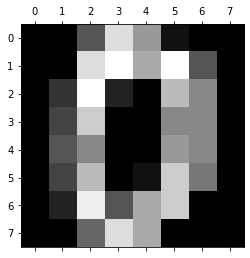

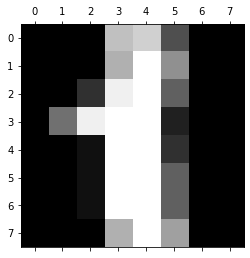

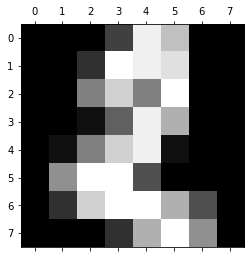

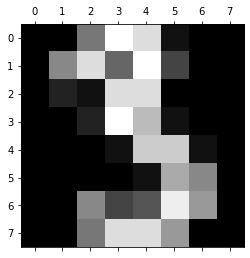

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.gray()
for i in range(4):
    plt.matshow(random_digits.images[i])

In [5]:
df=pd.DataFrame(random_digits.data)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [7]:
df['target']=random_digits.target
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(['target'],axis='columns'), df.target, test_size=0.2)

In [12]:
print(len(X_train))
print(len(X_test))

1437
360


In [13]:
#ensemble: used when using multiple algorithms to predict the out come (building multiple decision trees, taking majority vote)
from sklearn.ensemble import RandomForestClassifier
random_model=RandomForestClassifier()
random_model.fit(X_train,y_train)

RandomForestClassifier()

In [15]:
#n_estimators ~100 random trees were used: can specify in random_model=RandomForestClassifier(n_estimator=40) for e.g
random_model.score(X_test,y_test)

0.9916666666666667

In [16]:
y_predicted=random_model.predict(X_test)

In [17]:
from sklearn.metrics import confusion_matrix
cmm=confusion_matrix(y_test,y_predicted)
cmm

array([[32,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 33,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 40,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 39,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 41,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 32,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 39,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 37,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 29,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  1, 35]], dtype=int64)

Text(69.0, 0.5, 'y_test')

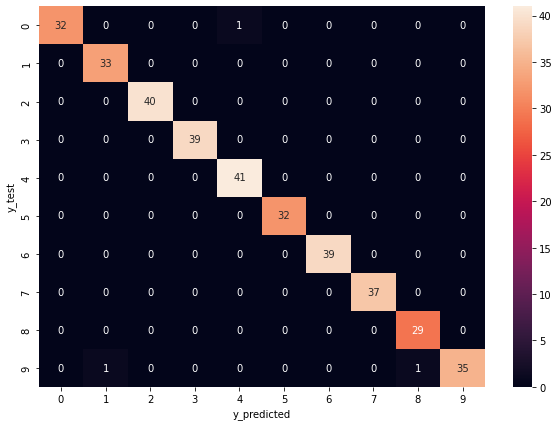

In [19]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmm, annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_test')

In [22]:
#EXERCISE
import pandas as pd
from sklearn.datasets import load_iris
iris=load_iris()

In [23]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [25]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [26]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [27]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [28]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(['target','flower_name'],axis='columns'),df.target,test_size=0.2)

In [30]:
print(len(X_train))
print(len(X_test))

120
30


In [36]:
from sklearn.ensemble import RandomForestClassifier
R_model=RandomForestClassifier()
R_model.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
R_model.score(X_test,y_test)

0.9666666666666667

In [38]:
y_predicted=R_model.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
cmr=confusion_matrix(y_test,y_predicted)
cmr

array([[ 9,  0,  0],
       [ 0, 10,  1],
       [ 0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'y_test')

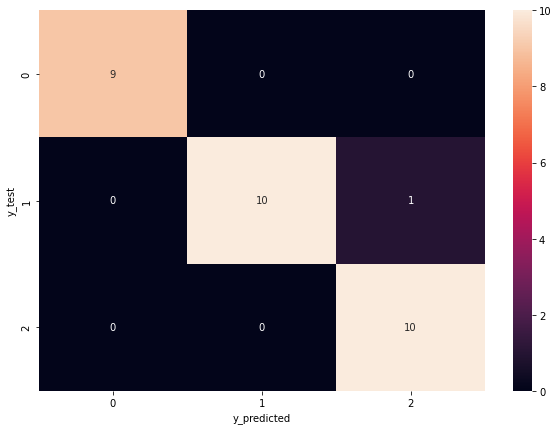

In [40]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cmr, annot=True)
plt.xlabel('y_predicted')
plt.ylabel('y_test')